<a href="https://colab.research.google.com/github/UnplugCharger/Week-6-IP/blob/master/Week6_Ip_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#INITIAL LOOK INTO OUR DATA 

**Importing or datasets**

In [ ]:
results=pd.read_csv('/content/drive/My Drive/Core Datasets/results.csv')
fifa=pd.read_csv('/content/drive/My Drive/Core Datasets/fifa_ranking.csv')

In [ ]:
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent duplicated'] = df.duplicated().sum()*100/len(df)
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('data type')

In [ ]:
sniff(results)

,sample,data type,percent duplicated,percent missing
neutral,False,bool,0.0,0.0
home_score,0,int64,0.0,0.0
away_score,0,int64,0.0,0.0
date,1872-11-30,object,0.0,0.0
home_team,Scotland,object,0.0,0.0
away_team,England,object,0.0,0.0
tournament,Friendly,object,0.0,0.0
city,Glasgow,object,0.0,0.0
country,Scotland,object,0.0,0.0


In [ ]:
sniff(fifa)

,sample,data type,percent duplicated,percent missing
rank,1,int64,0.064022,0.0
previous_points,57,int64,0.064022,0.0
rank_change,0,int64,0.064022,0.0
total_points,0,float64,0.064022,0.0
cur_year_avg,0,float64,0.064022,0.0
cur_year_avg_weighted,0,float64,0.064022,0.0
last_year_avg,0,float64,0.064022,0.0
last_year_avg_weighted,0,float64,0.064022,0.0
two_year_ago_avg,0,float64,0.064022,0.0
two_year_ago_weighted,0,float64,0.064022,0.0


From the above ... we have no duplicates and null values in the Results dataset . 
We have  no null values on the fifa dataset  but we have  0.06402 % duplicated values

We are goin to drop these values in our next step

#DATA CLEANING

In [ ]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


From the above we can see some values like the maximum home team goal of 31. That is very posible in football but rarely occurs  in football and we are going to drop them 

we also see that the away score has a maximum of 21 ... this can happen in football but we are going to drop them as it rarely occurs

In [ ]:
fifa.drop_duplicates(inplace=True)

In [ ]:
sniff(fifa)

,sample,data type,percent duplicated,percent missing
rank,1,int64,0.0,0.0
previous_points,57,int64,0.0,0.0
rank_change,0,int64,0.0,0.0
total_points,0,float64,0.0,0.0
cur_year_avg,0,float64,0.0,0.0
cur_year_avg_weighted,0,float64,0.0,0.0
last_year_avg,0,float64,0.0,0.0
last_year_avg_weighted,0,float64,0.0,0.0
two_year_ago_avg,0,float64,0.0,0.0
two_year_ago_weighted,0,float64,0.0,0.0


In [ ]:
fifa.shape

(57756, 16)

Even after dropping the duplicates we still have a good amount of data which is **fabulous**

In [ ]:
results[results.home_score<15]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [ ]:
results[results.away_score<15]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [ ]:
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


#CREATING THE DATASET THAT WE WILL USE FOR ANALYSIS

we will join our datasets to be come one 
by doing this we hope to get to know the home team rank and the away team rank at the time the matches were played

In [ ]:
fifa.shape

(57756, 16)

In [ ]:
results.shape

(40839, 9)

Adding new columns to our dataset year and month

In [ ]:
results['date']=pd.to_datetime(results['date'])

In [ ]:
fifa['rank_date']=pd.to_datetime(fifa['rank_date'])

In [ ]:
results['year']=results['date'].dt.year

In [ ]:
results['month']=results['date'].dt.month

In [ ]:
fifa['year']=fifa['rank_date'].dt.year

In [ ]:
fifa['month']=fifa['rank_date'].dt.month

cecking our new dataset with added columns

In [ ]:
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3


In [ ]:
fifa.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [ ]:
fifa3=fifa[['year','month','country_full','rank']]

In [ ]:
fifa3.head()

,year,month,country_full,rank
0,1993,8,Germany,1
1,1993,8,Italy,2
2,1993,8,Switzerland,3
3,1993,8,Sweden,4
4,1993,8,Argentina,5


In [ ]:
fifa3.rename(columns={'country_full':'home_team'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
fifa3.head(1)

,year,month,home_team,rank
0,1993,8,Germany,1


Doing an inner join to capture home team rank

In [ ]:
overall=pd.merge(left=fifa3,right=results,on=['home_team','year','month'],how='inner')

In [ ]:
overall.head()

,year,month,home_team,rank,date,away_team,home_score,away_score,tournament,city,country,neutral
0,1993,8,Sweden,4,1993-08-11,Switzerland,1,2,Friendly,Borås,Sweden,False
1,1993,8,Sweden,4,1993-08-22,France,1,1,FIFA World Cup qualification,Solna,Sweden,False
2,1993,8,Argentina,5,1993-08-22,Peru,2,1,FIFA World Cup qualification,Buenos Aires,Argentina,False
3,1993,8,Argentina,5,1993-08-29,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False
4,1993,8,Brazil,8,1993-08-08,Mexico,1,1,Friendly,Maceió,Brazil,False


In [ ]:
overall.shape

(18593, 12)

renaming the rank column to home_team_rank

In [ ]:
overall.rename(columns={'rank':'home_team_rank'},inplace=True)

getting the away team rank 

In [ ]:
fifa3.rename(columns={'home_team':'away_team'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
fifa3.head(1)

,year,month,away_team,rank
0,1993,8,Germany,1


Doing an inner join to get the away rank

In [ ]:
overall2=pd.merge(left=fifa3,right=overall,on=['away_team','year','month'],how='inner')

In [ ]:
overall2.shape

(16918, 13)

In [ ]:
overall2.head(2)

,year,month,away_team,rank,home_team,home_team_rank,date,home_score,away_score,tournament,city,country,neutral
0,1993,8,Switzerland,3,Sweden,4,1993-08-11,1,2,Friendly,Borås,Sweden,False
1,1993,8,Argentina,5,Colombia,19,1993-08-15,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False


In [ ]:
overall2.rename(columns={'rank':'away_team_rank'},inplace=True)

Getting a copy of our final dataset for pre processing

In [ ]:
fifa_ranking= overall2.copy()

# Data Cleaning

In [ ]:
fifa_analysis.head()

,year,month,away_team,away_team_rank,home_team,home_team_rank,date,home_score,away_score,tournament,city,country,neutral
0,1993,8,Switzerland,3,Sweden,4,1993-08-11,1,2,Friendly,Borås,Sweden,False
1,1993,8,Argentina,5,Colombia,19,1993-08-15,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False
2,1993,8,Argentina,5,Paraguay,67,1993-08-08,1,3,FIFA World Cup qualification,Asunción,Paraguay,False
3,1993,8,Argentina,5,Peru,70,1993-08-01,0,1,FIFA World Cup qualification,Lima,Peru,False
4,1993,8,Brazil,8,Uruguay,22,1993-08-15,1,1,FIFA World Cup qualification,Montevideo,Uruguay,False


Re-arranging our dataset columns tolook good

In [ ]:
fifa_ranking=fifa_analysis[['away_team','home_team','away_score','home_score','away_team_rank','home_team_rank','year','neutral','tournament']]

In [ ]:
fifa_ranking.head()

,away_team,home_team,away_score,home_score,away_team_rank,home_team_rank,year,neutral,tournament
0,Switzerland,Sweden,2,1,3,4,1993,False,Friendly
1,Argentina,Colombia,1,2,5,19,1993,False,FIFA World Cup qualification
2,Argentina,Paraguay,3,1,5,67,1993,False,FIFA World Cup qualification
3,Argentina,Peru,1,0,5,70,1993,False,FIFA World Cup qualification
4,Brazil,Uruguay,1,1,8,22,1993,False,FIFA World Cup qualification


Taking A look at our dataset 

In [ ]:
sniff(fifa_ranking)

,sample,data type,percent duplicated,percent missing
neutral,False,bool,0.319187,0.0
away_score,2,int64,0.319187,0.0
home_score,1,int64,0.319187,0.0
away_team_rank,3,int64,0.319187,0.0
home_team_rank,4,int64,0.319187,0.0
year,1993,int64,0.319187,0.0
away_team,Switzerland,object,0.319187,0.0
home_team,Sweden,object,0.319187,0.0
tournament,Friendly,object,0.319187,0.0


from the above we can see that 0.319187 % of our values are duplicated 

In [ ]:
fifa_ranking.drop_duplicates(inplace=True)

In [ ]:
fifa_ranking.shape

(16864, 9)

After droppng the duplicates we stillhave a solid 16864 entries 

Which is good

In [ ]:
fifa_ranking.describe()

,away_score,home_score,away_team_rank,home_team_rank,year
count,16864.000000,16864.000000,16864.000000,16864.000000,16864.000000
mean,1.069616,1.604602,78.862014,76.029886,2006.498399
std,1.245909,1.615972,52.008990,50.853498,6.803753
min,0.000000,0.000000,1.000000,1.000000,1993.000000
25%,0.000000,0.000000,35.000000,33.000000,2001.000000
50%,1.000000,1.000000,72.000000,70.000000,2007.000000
75%,2.000000,2.000000,115.000000,112.000000,2012.000000
max,15.000000,31.000000,209.000000,209.000000,2018.000000


In [ ]:
fifa_ranking.head(1)

,away_team,home_team,away_score,home_score,away_team_rank,home_team_rank,year,neutral,tournament
0,Switzerland,Sweden,2,1,3,4,1993,False,Friendly


#EXPLORATORY DATA ANALYSIS

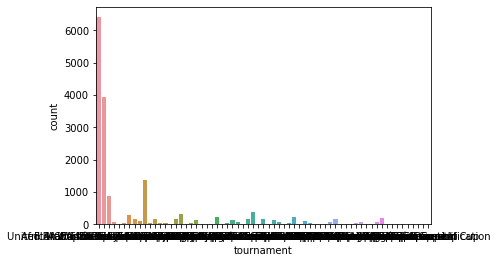

In [ ]:
sns.countplot(fifa_ranking['tournament'])

from the above we can see that we have  many types of tornaments 

lets see what they are 

In [ ]:
fifa_ranking['tournament'].unique()

array(['Friendly', 'FIFA World Cup qualification',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Baltic Cup', 'Oceania Nations Cup qualification',
       'Simba Tournament', 'Gulf Cup', 'CECAFA Cup', 'Dynasty Cup',
       "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco', 'USA Cup',
       'Korea Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'King Hassan II Tournament', 'AFC Asian Cup',
       'Cyprus International Tournament', 'Dunhill Cup', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',

Thats alot to deal with 

we are going to treat all the qualifiers and repective cups as one tournament

In [ ]:
 fifa_ranking['tournament'].value_counts()

Friendly                                6408
FIFA World Cup qualification            3950
UEFA Euro qualification                 1383
African Cup of Nations qualification     871
AFC Asian Cup qualification              387
                                        ... 
Copa del Pacífico                          4
Dragon Cup                                 4
OSN Cup                                    4
SKN Football Festival                      2
Copa América qualification                 2
Name: tournament, Length: 65, dtype: int64

I am going to run this cell several times while replacing the items in the column

In [ ]:
def filter_b(column):
     if  column == 'UAFA Cup qualification':
          return 'UAFA Cup'
     else:
          return column

In [ ]:
fifa_ranking['tournament']=fifa_ranking['tournament'].apply(filter_b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fifa_ranking['tournament'].value_counts()

Friendly                                      6408
FIFA World Cup                                4113
UEFA Euro                                     1554
African Cup of Nations                        1149
AFC Asian Cup                                  507
CECAFA Cup                                     309
CFU Caribbean Cup                              267
Copa América                                   227
COSAFA Cup                                     222
Gold Cup                                       191
African Nations Championship                   186
AFF Championship                               178
Gulf Cup                                       164
UNCAF Cup                                      142
AFC Challenge Cup                              122
SAFF Cup                                       118
Oceania Nations Cup                            113
Confederations Cup                             112
Cyprus International Tournament                 70
WAFF Championship              

In [ ]:
len(fifa_ranking['tournament'].value_counts())

55

After collapsing allthe qualifiers with their respective competitions we are left with 55 different competitions 

the highest number being friendlies followed by worldcup and then UEFA EURO then AFCON and then Asian Cup of Nations 

This is a good representation of the football space as those are the mahor football tournaments involving national teams across the globe.

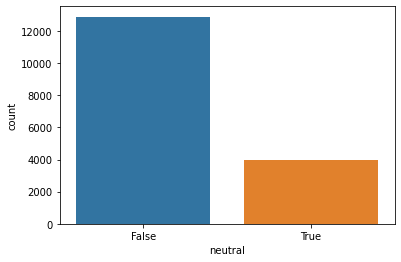

In [ ]:
sns.countplot(fifa_ranking['neutral'])

from the above we can see that most matches were hosted matches . Matches played at neutral grounds were about 4000 a number close to the number of worldcup matches . But as we all know . World cup matches are always played in neutral grounds.

In [ ]:
fifa_ranking['away_score'].sum()

18038

In [ ]:
fifa_ranking['home_score'].sum()

27060

we observe from the sum of goals 

home teams netted more goals than away teams in our dataset 
home teams had a totalof 27060 agains 18038 by away teams

# CATEGORICAL VARIABLES ENCODING  AND FEATURE ENGINEERING

Before we do this we will write a copy of our dataset to Csv for safe Keeping ..... Just incase things Go South

In [ ]:
fifa_for_keep=fifa_ranking.to_csv('/content/drive/My Drive/Core Datasets/fifa_for_keep.csv')

In [5]:
fifa_ranking=pd.read_csv('/content/drive/My Drive/Core Datasets/fifa_for_keep.csv')

In [6]:
fifa_ranking.drop('Unnamed: 0',axis=1,inplace=True)

Getting the agregate goal



In order to  which team won and which team lost  we are going to create a new column   with agregate score . away goals will be treated as negatives and home goals will be treated as positives

In [7]:
fifa_ranking["agg_goals"] = fifa_ranking['home_score'] - fifa_ranking['away_score']
fifa_ranking["agg_goals"]

0       -1
1        1
2       -2
3       -1
4        0
        ..
16859    0
16860    0
16861    6
16862    0
16863    0
Name: agg_goals, Length: 16864, dtype: int64

In [8]:
home_results = []
away_results =[]
for agg_goals in fifa_ranking['agg_goals']:
  if agg_goals > 0:
    home_results.append("Win")
    away_results.append('Lose')
  elif agg_goals < 0:
    home_results.append("Lose")
    away_results.append('Win')
  else:
    home_results.append("Draw")
    away_results.append('Draw')  
fifa_ranking['home_results'] = home_results
fifa_ranking['away_results'] = away_results



In [9]:
fifa_ranking.head()

,away_team,home_team,away_score,home_score,away_team_rank,home_team_rank,year,neutral,tournament,agg_goals,home_results,away_results
0,Switzerland,Sweden,2,1,3,4,1993,False,Friendly,-1,Lose,Win
1,Argentina,Colombia,1,2,5,19,1993,False,FIFA World Cup,1,Win,Lose
2,Argentina,Paraguay,3,1,5,67,1993,False,FIFA World Cup,-2,Lose,Win
3,Argentina,Peru,1,0,5,70,1993,False,FIFA World Cup,-1,Lose,Win
4,Brazil,Uruguay,1,1,8,22,1993,False,FIFA World Cup,0,Draw,Draw


In [10]:
for feature in fifa_ranking.columns[:]:
  print(feature,':', len(fifa_ranking[feature].unique()),'lebels')

away_team : 193 lebels
home_team : 193 lebels
away_score : 14 lebels
home_score : 21 lebels
away_team_rank : 209 lebels
home_team_rank : 209 lebels
year : 26 lebels
neutral : 2 lebels
tournament : 55 lebels
agg_goals : 34 lebels
home_results : 3 lebels
away_results : 3 lebels


In [11]:
tournament_map= fifa_ranking['tournament'].value_counts().to_dict()

In [12]:
tournament_map

{'ABCS Tournament': 8,
 'AFC Asian Cup': 507,
 'AFC Challenge Cup': 122,
 'AFF Championship': 178,
 'African Cup of Nations': 1149,
 'African Nations Championship': 186,
 'Amílcar Cabral Cup': 58,
 'Baltic Cup': 37,
 'CECAFA Cup': 309,
 'CFU Caribbean Cup': 267,
 'COSAFA Cup': 222,
 'Confederations Cup': 112,
 'Copa América': 227,
 'Copa Paz del Chaco': 5,
 'Copa del Pacífico': 4,
 'Cyprus International Tournament': 70,
 'Dragon Cup': 4,
 'Dunhill Cup': 14,
 'Dynasty Cup': 7,
 'EAFF Championship': 47,
 'FIFA World Cup': 4113,
 'Friendly': 6408,
 'Gold Cup': 191,
 'Gulf Cup': 164,
 'Intercontinental Cup': 7,
 'King Hassan II Tournament': 12,
 "King's Cup": 49,
 'Kirin Cup': 45,
 'Korea Cup': 7,
 'Lunar New Year Cup': 13,
 'Malta International Tournament': 37,
 'Merdeka Tournament': 21,
 'Millennium Cup': 10,
 'Nations Cup': 6,
 'Nehru Cup': 31,
 'Nile Basin Tournament': 10,
 'Nordic Championship': 10,
 'OSN Cup': 4,
 'Oceania Nations Cup': 113,
 'Pacific Games': 19,
 "Prime Minister's C

In [13]:
fifa_ranking2=fifa_ranking.copy()

In [14]:
fifa_ranking2['tournament']=fifa_ranking2['tournament'].map(tournament_map)

In [15]:
fifa_ranking2.head()

,away_team,home_team,away_score,home_score,away_team_rank,home_team_rank,year,neutral,tournament,agg_goals,home_results,away_results
0,Switzerland,Sweden,2,1,3,4,1993,False,6408,-1,Lose,Win
1,Argentina,Colombia,1,2,5,19,1993,False,4113,1,Win,Lose
2,Argentina,Paraguay,3,1,5,67,1993,False,4113,-2,Lose,Win
3,Argentina,Peru,1,0,5,70,1993,False,4113,-1,Lose,Win
4,Brazil,Uruguay,1,1,8,22,1993,False,4113,0,Draw,Draw


In [16]:
fifa_ranking2['tournament']=fifa_ranking2['tournament'].astype('category')

In [17]:
fifa_ranking2.dtypes

away_team           object
home_team           object
away_score           int64
home_score           int64
away_team_rank       int64
home_team_rank       int64
year                 int64
neutral               bool
tournament        category
agg_goals            int64
home_results        object
away_results        object
dtype: object

In [18]:
neutral_map=fifa_ranking2['neutral'].value_counts().to_dict()

In [19]:
fifa_ranking2['neutral']=fifa_ranking2['neutral'].map(neutral_map)

In [20]:
fifa_ranking2['neutral']=fifa_ranking2['neutral'].astype('category')

# MODELING

Polynomial Regression Analysis

predicting how many goals away team scores 

In [21]:
#cheking for multicollinearity
correlation = fifa_ranking2.corr()
correlation

,away_score,home_score,away_team_rank,home_team_rank,year,agg_goals
away_score,1.000000,-0.163729,-0.179898,0.221711,-0.008585,-0.687800
home_score,-0.163729,1.000000,0.318738,-0.135415,-0.038806,0.828718
away_team_rank,-0.179898,0.318738,1.000000,0.469472,0.106276,0.336598
home_team_rank,0.221711,-0.135415,0.469472,1.000000,0.104357,-0.225425
year,-0.008585,-0.038806,0.106276,0.104357,1.000000,-0.023684
agg_goals,-0.687800,0.828718,0.336598,-0.225425,-0.023684,1.000000


There is a strong corellation between away score home score and the agg goals .... this is expected as that column was calculated from the two 



In [22]:
VIF=pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)


In [23]:
VIF

,away_score,home_score,away_team_rank,home_team_rank,year,agg_goals
away_score,6.315933e+12,-8.191907e+12,0.273759,-0.358542,0.033906,1.113287e+13
home_score,-8.191907e+12,1.062509e+13,-0.421290,0.319418,0.040001,-1.443959e+13
away_team_rank,2.737587e-01,-4.212900e-01,1.755595,-0.994292,-0.103448,-2.800956e-01
home_team_rank,-3.585421e-01,3.194176e-01,-0.994292,1.638052,-0.051422,1.914035e-01
year,3.390570e-02,4.000068e-02,-0.103448,-0.051422,1.019093,3.753602e-02
agg_goals,1.113287e+13,-1.443959e+13,-0.280096,0.191404,0.037536,1.962353e+13


In [24]:
y=fifa_ranking2['home_score'].values
X= fifa_ranking2[['home_team_rank','away_team_rank','tournament','neutral']].values

VIF scores are read along the diagonal  and is straight foward . home team rank hasa VIF of 1.638052  

In [26]:
#Import libaries
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [27]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)



In [28]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Predict using Polynomial Regression

# Predict using Polynomial Regression 

#match between  colombia and argentina  which was not played at a neutral ground 
poly_pred = pol_reg.predict(poly_reg.fit_transform([[19, 5, 4113,12883]]))
print('Polynomial prediction: %d' %poly_pred)

poly_pred = pol_reg.predict(poly_reg.fit_transform([[4, 3, 6408,12883]]))
print('Polynomial prediction: %d' %poly_pred)


Polynomial prediction: 1
Polynomial prediction: 1


The above was trying to predict the scores of the matches below and  as we can see our model gets  one correctly and misses the other

In [31]:
y_new=pol_reg.predict(X_poly)

In [32]:
rmse = np.sqrt(mean_squared_error(y,y_new))
r2 = r2_score(y,y_new)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  1.399688687863321
R2:  0.24972455093305046


In [33]:
fifa_ranking2.head(2)

,away_team,home_team,away_score,home_score,away_team_rank,home_team_rank,year,neutral,tournament,agg_goals,home_results,away_results
0,Switzerland,Sweden,2,1,3,4,1993,12883,6408,-1,Lose,Win
1,Argentina,Colombia,1,2,5,19,1993,12883,4113,1,Win,Lose


Predicting away score 

In [34]:
y=fifa_ranking2['away_score'].values

X= fifa_ranking2[['home_team_rank','away_team_rank','tournament','neutral']].values

In [35]:
# Split the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


In [36]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#match between  colombia and argentina  which was not played at a neutral ground 
poly_pred = pol_reg.predict(poly_reg.fit_transform([[19, 5, 4113,12883]]))
print('Polynomial prediction: %d' %poly_pred)

poly_pred = pol_reg.predict(poly_reg.fit_transform([[4, 3, 6408,12883]]))
print('Polynomial prediction: %d' %poly_pred)


Polynomial prediction: 1
Polynomial prediction: 1


In [38]:
y_new=pol_reg.predict(X_poly)

In [39]:
rmse = np.sqrt(mean_squared_error(y,y_new))
r2 = r2_score(y,y_new)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  1.1081552817862244
R2:  0.20885870287603092


We have a very poor model here 


but now lets go ahead and Cross Validate it

Since the two models have pretty much the same score ... we are going to just do a cross validation on one 



we will use Kfolds for this

In [42]:
from sklearn.model_selection import KFold

y=fifa_ranking2['away_score'].values

X= fifa_ranking2[['home_team_rank','away_team_rank','tournament','neutral']].values




folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

  

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1457811635198116

Training model 2
Model 2 Root Mean Squared Error: 1.1697342304375942

Training model 3
Model 3 Root Mean Squared Error: 1.1712537568626336

Training model 4
Model 4 Root Mean Squared Error: 1.1200284323478438

Training model 5
Model 5 Root Mean Squared Error: 1.0945035126352036


In [43]:
 print(f'\nThe mean of the above rmses is {np.mean(RMSES)}')


The mean of the above rmses is 1.1402602191606175


From cross validation we find that our second model did well than.... we had an accuracy that was greater than our mean cross validation accuracy

Logistic Regression